In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
df = pd.read_csv("/content/COVID clinical trials.csv")
print(" Dataset Loaded. Shape:", df.shape)
print("\n Original Columns:\n", df.columns.tolist())

 Dataset Loaded. Shape: (5783, 27)

 Original Columns:
 ['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results', 'Conditions', 'Interventions', 'Outcome Measures', 'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment', 'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted', 'Results First Posted', 'Last Update Posted', 'Locations', 'Study Documents', 'URL']


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df = df.loc[:, ~df.columns.duplicated()]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [4]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Convert 'Attrition' column to binary (Yes=1, No=0)

In [6]:
df['AttritionFlag'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# 2. Understand Current Turnover Rates


In [8]:
overall_attrition_rate = df['AttritionFlag'].mean() * 100
print(f"Overall Employee Attrition Rate: {overall_attrition_rate:.2f}%\n")

Overall Employee Attrition Rate: 16.12%



# Analyze demographic distribution of attrition


In [10]:
demographic_factors = ['Age', 'Gender', 'EducationField', 'Department', 'JobRole']

for factor in demographic_factors:
    print(f"\nAttrition Rate by {factor}:")
    result = df.groupby(factor)['AttritionFlag'].mean().reset_index()
    result['AttritionRate(%)'] = result['AttritionFlag'] * 100
    print(result[[factor, 'AttritionRate(%)']])



Attrition Rate by Age:
    Age  AttritionRate(%)
0    18         50.000000
1    19         66.666667
2    20         54.545455
3    21         46.153846
4    22         31.250000
5    23         28.571429
6    24         26.923077
7    25         23.076923
8    26         30.769231
9    27          6.250000
10   28         29.166667
11   29         26.470588
12   30         15.000000
13   31         26.086957
14   32         18.032787
15   33         20.689655
16   34         11.688312
17   35         12.820513
18   36          8.695652
19   37         12.000000
20   38          3.448276
21   39         14.285714
22   40          8.771930
23   41         15.000000
24   42          4.347826
25   43          6.250000
26   44         18.181818
27   45          4.878049
28   46         12.121212
29   47         12.500000
30   48         10.526316
31   49          8.333333
32   50         16.666667
33   51         10.526316
34   52         16.666667
35   53         10.526316
36   54       

In [12]:
factors = ['JobInvolvement', 'WorkLifeBalance', 'MonthlyIncome',
           'PercentSalaryHike', 'StockOptionLevel', 'AttritionFlag']
corr_data = df[factors]

# Correlation Matrix


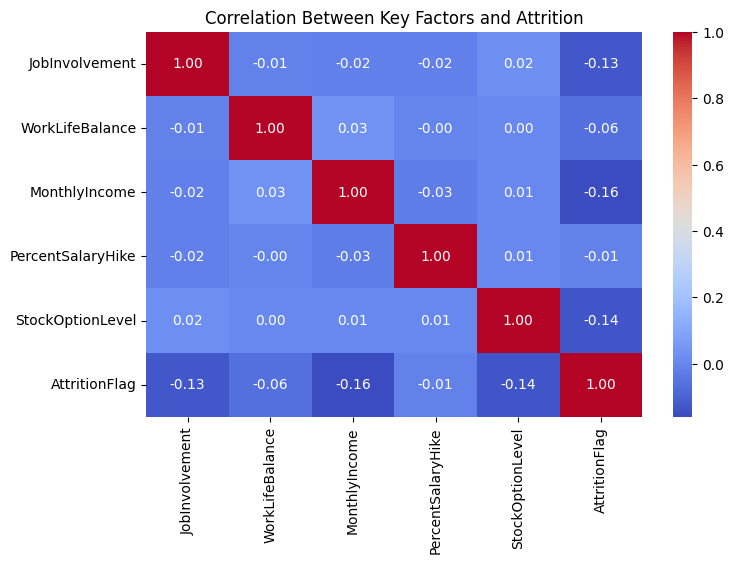

In [14]:
correlation_matrix = corr_data.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Key Factors and Attrition")
plt.show()


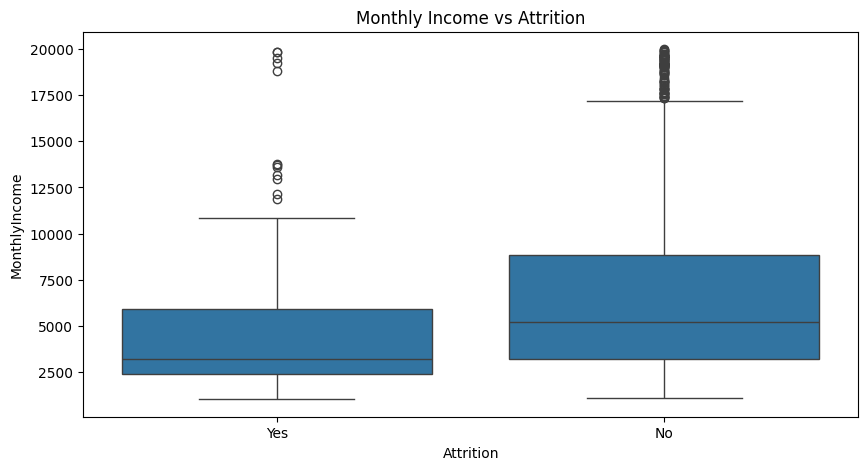

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Attrition")
plt.show()

/tmp/ipython-input-2187625763.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='WorkLifeBalance', y='AttritionFlag', data=df, ci=None)


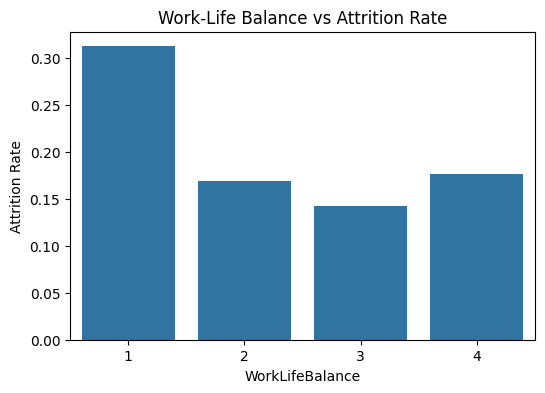

In [17]:
plt.figure(figsize=(6, 4))
sns.barplot(x='WorkLifeBalance', y='AttritionFlag', data=df, ci=None)
plt.title("Work-Life Balance vs Attrition Rate")
plt.ylabel("Attrition Rate")
plt.show()

# 5. Predictive Modeling (Logistic Regression)


In [19]:
X = df[['JobInvolvement', 'WorkLifeBalance', 'MonthlyIncome',
        'PercentSalaryHike', 'StockOptionLevel']]
y = df['AttritionFlag']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

In [23]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [29]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [30]:
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       1.00      0.03      0.05        71

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.48       441
weighted avg       0.87      0.84      0.78       441

ROC AUC Score: 0.69


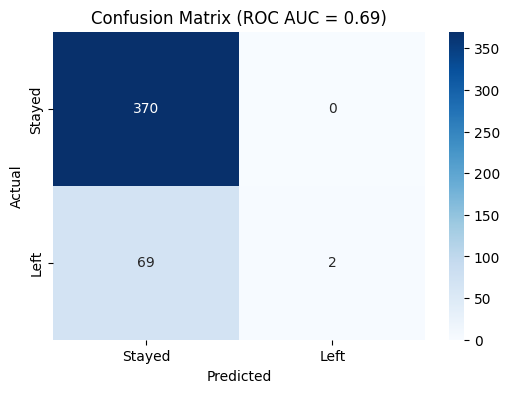

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title(f'Confusion Matrix (ROC AUC = {roc_auc:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


=== Feature Importance (Higher = More Influence) ===
             Feature  Importance
4   StockOptionLevel    0.544006
0     JobInvolvement    0.465058
1    WorkLifeBalance    0.282718
3  PercentSalaryHike    0.015121
2      MonthlyIncome    0.000131


/tmp/ipython-input-1467647779.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')


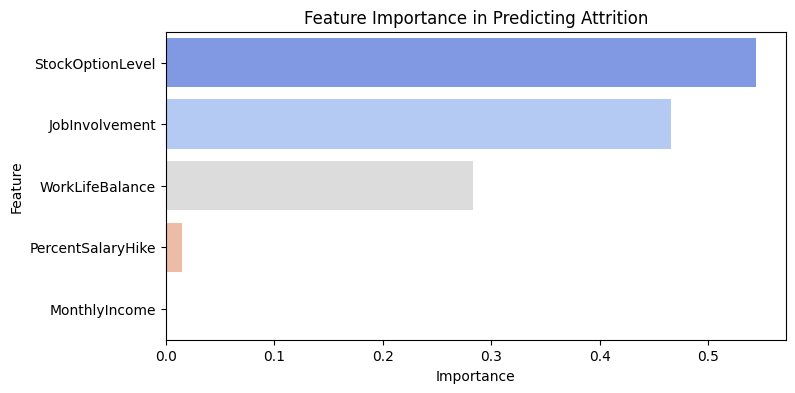

In [34]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.coef_[0])
}).sort_values(by='Importance', ascending=False)

print("\n=== Feature Importance (Higher = More Influence) ===")
print(feature_importance)

plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')
plt.title("Feature Importance in Predicting Attrition")
plt.show()